In [5]:
import PIL
print('Pillow version: ', PIL.__version__)

Pillow version:  9.0.1


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
img = PIL.Image.open('../datasets/shape1.png')
print(img.format, img.size, img.mode)

PNG (259, 195) P


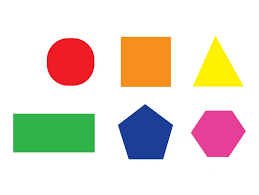

In [10]:
img

In [11]:
data = np.asarray(img)
print(data.shape)

(195, 259)


In [20]:
U,S,V_t = np.linalg.svd(data)

print(U.shape, S.shape, V_t.shape)

(195, 195) (195,) (259, 259)


In [42]:
S[4]

548.344193615566

In [43]:
rank_1 = np.dot(U[:,:1], V_t[:1,:]) * S[1]

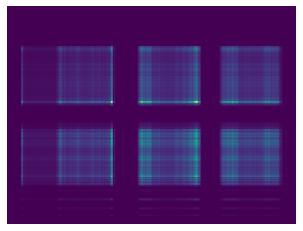

In [44]:
plt.axis('off')
plt.imshow(rank_1)
plt.show()

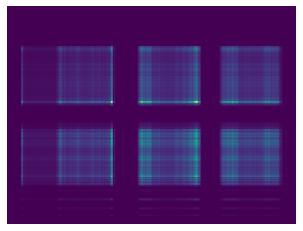

In [40]:
rank_2 = np.dot(U[:,:3], V_t[:3,:]) * S[3]
plt.axis('off')
plt.imshow(rank_1)
plt.show()

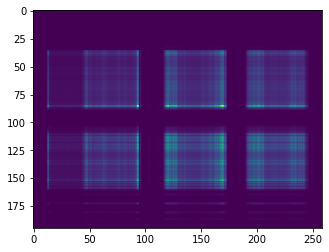

In [50]:
r1 = U[:,:1] * V_t[:1,:] * S[1]
plt.imshow(r1)

In [60]:
def low_rank_approx(data, rank):
    U,S,V_t = np.linalg.svd(data, full_matrices=True)
    return np.dot(U[:,:rank], V_t[:rank,:]) * S[rank]

In [85]:


rank_arr = []

for i in range(1, 11):
    r = low_rank_approx(data, i)
    rank_arr.append(r)



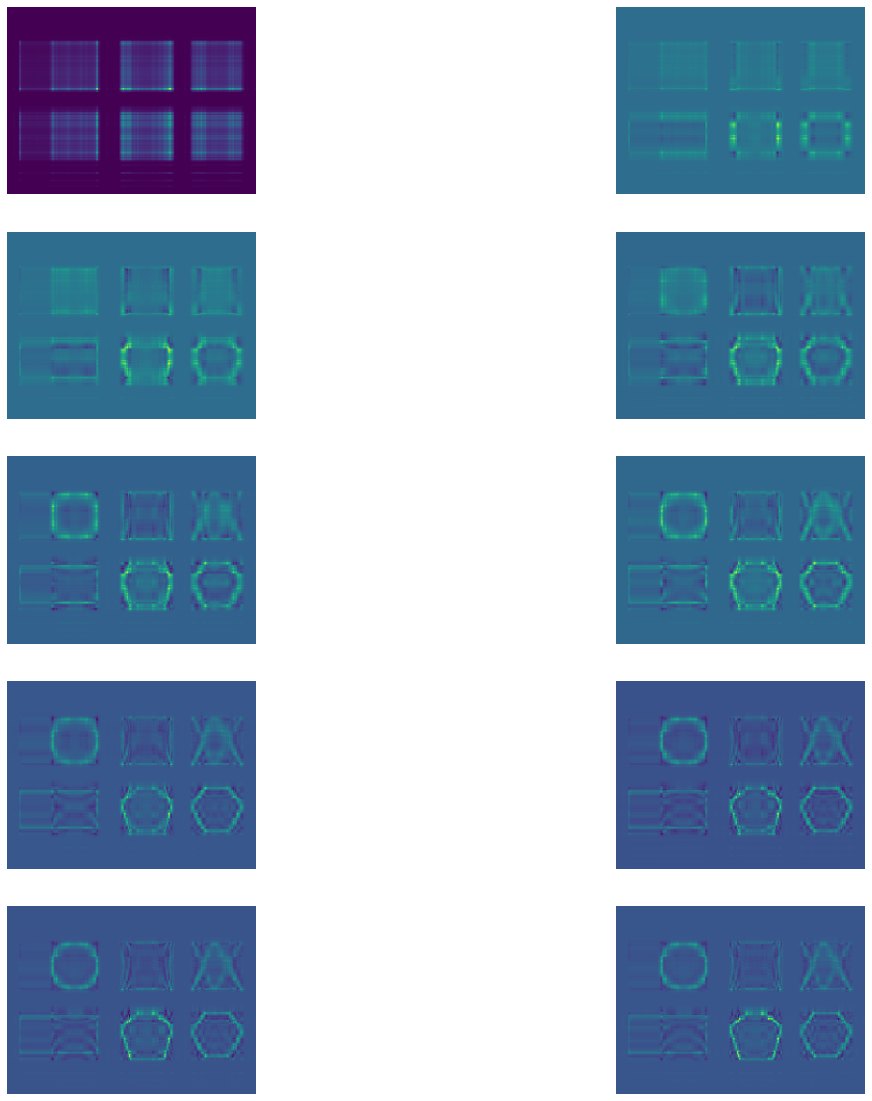

In [88]:
fig, axs =  plt.subplots(5, 2, figsize=(20,20))
for i in range(0, 10):
    axs[i//2, i%2].imshow(rank_arr[i])
    axs[i//2, i%2].axis('off')